In [137]:
pip install numpy matplotlib panda

Note: you may need to restart the kernel to use updated packages.


##### Designing the class hierarchy:

In [138]:
'''
                                      General Neuron
                                    /                \
                                   /                  \
                                  /                    \
                                 /                      \
                    Sensory Neuron                      Motor Neuron
                   /            \                      /            \
                  /              \                    /              \
                 /                \                  /                \
                /                  \                /                  \
    Photoreceptor        Mechanoreceptor      Alpha Motor Neuron      Gamma Motor Neuron

'''

'\nGeneral Neuron\n|\n|_____________Sensory Neuron\n|             |_______________Photoreceptor\n|             |_______________Mechanoreceptor\n|\n|             \n|_____________Motor Neuron:\n              |_______________Alpha Motor Neuron\n              |_______________Gamma Motor Neuron\n'

##### Define the classes:

In [139]:
#Base class:
class GeneralNeuron:
    # Represents a generic neuron with basic properties and functions common to all neuron types
    def __init__(self, firing_rate = 0.0):
        self.firing_rate = firing_rate
        # The firing rate of the neuron (frequency of firing) is excepted from the user
        # If not received, firing_rate will be set as the default value which is 0.0
    def activate(self, stimulus_strength):
        # Calculates the firing rate based on the stimulus strength
        # Currently, not being implemented
        pass

#Intermediate classes:
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        # Represents a neuron that detects and responds to specific external stimuli
        super().__init__(firing_rate) # Initialize the firing rate from the base class
        self.receptor_type = receptor_type # The type of stimulus the neuron is sensitive to (e.g., light or pressure)
    def sense_stimulus(self):
        # Processes a stimulus and calculates an activation response
        # Currently, not being implemented
        pass
class MotorNeuron(GeneralNeuron):
    # Represents a neuron responsible for controlling muscle movement
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate) # Initialize the firing rate from the base class
        self.target_muscle = target_muscle # The muscle controlled by this motor neuron
    def control_muscle(self):
        # Sends activation signals to control the target muscle
        # Currently, not being implemented
        pass

#leaf classes:
class Photoreceptor(SensoryNeuron):
    # Represents a sensory neuron sensitive to light (a type of sensory neuron)
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "light") # Fixes receptor type for light-sensitive neurons
    def light_detection(self, light_intensity):
        # Detects light intensity and adjusts firing rate accordingly
        # Currently, not being implemented
        pass
class Mechanoreceptor(SensoryNeuron):
    # Represents a sensory neuron sensitive to pressure (a type of sensory neuron)
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "pressure") # Fixes receptor type for pressure-sensitive neurons
    def pressure_detection(self, pressure):
        # Detects pressure and adjusts firing rate accordingly
        # Currently, not being implemented
        pass

class AlphaMotorNeuron(MotorNeuron):
    # Represents a motor neuron that controls skeletal muscles
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "skeletal muscle") # Fixed target muscle for skeletal control
    def skeletal_muscle_control(self):
        # Controls contraction and movement of skeletal muscles
        # Currently, not being implemented
        pass
class GammaMotorNeuron(MotorNeuron):
    # Represents a motor neuron that controls muscle spindles to regulate muscle tone
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "muscle spindle") # Fixed target muscle for spindle control
    def muscle_spindle_control(self):
        # Adjusts tension in muscle spindles to regulate tone
        # Currently, not being implemented
        pass

### downsample a signal
Here we have a function that samples a sinusoidal signal while preserving all maximum and minimum points.
Input to function: a NumPy array representing a sinusoidal signal with a frequency of 5Hz, sampled every 0.01 seconds.
Output: a new numpy array representing the same signal. The length of the new array should be approximately 20% of the original one.

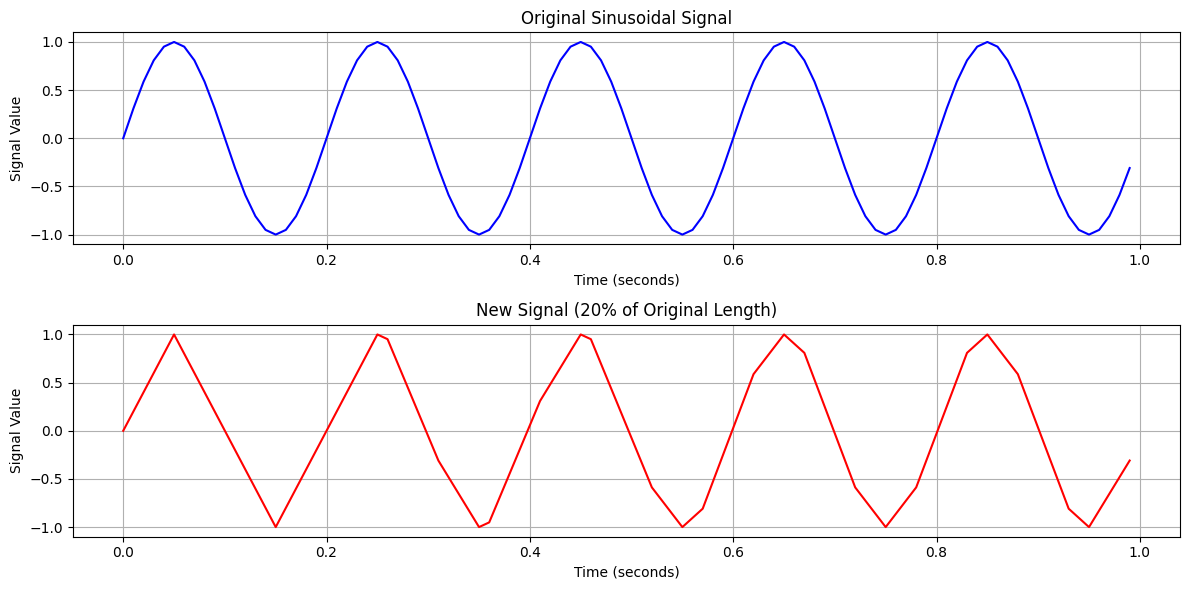

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def downsample(signal: np.array) -> np.array:
    #in signal: frequency = 5, sample_gap = 0.01
    #we want to get a new np.array with 20% of the length of the original one.
    steps = 5   #we will skip 5 points ahead in evey step, in order to reduce 80% of the arrys length
    diffrences = np.diff(signal)    #get a np.array of the gaps between evey two values in 'signal'
    #local maxima and minima occur when the function goes from increasing to decreasing and vice versa
    maxima = np.where((diffrences[:-1] > 0) & (diffrences[1:] < 0))[0] + 1
    minima = np.where((diffrences[:-1] < 0) & (diffrences[1:] > 0))[0] + 1
    #We will take every fifth value in the original signal   
    every_fifth_index = np.linspace(0, len(signal)-1, (len(signal))//steps).astype(int) 
    #We will combine the indexes we got from the three arrays so far, so that no value is repeated twice
    new_signal = np.unique(np.concatenate((every_fifth_index, maxima, minima)))
    # Create a new signal by selecting only the values at the indices in new_signal
    result = signal[new_signal]  # Select the values from the original signal using new_signal as indices
    return result, new_signal

#See an example:
#create a sinus wave
x = np.arange(0, 1, 0.01)  #Time: between 0 and 1 second, in increments of 0.01
sine_wave = np.sin(2 * np.pi * 5 * x)  #A sine wave with a frequency of 5 Hz

#calling the function
result, new_signal = downsample(sine_wave)

#ploting the display surface
plt.figure(figsize=(12, 6))

#displaing the original signal
plt.subplot(2, 1, 1) #2 rows, 1 graph per row, currently ploting the first graph.
plt.plot(x, sine_wave, color="blue") #x = x values range, sine_wave = y values
plt.title("Original Sinusoidal Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Value")
plt.grid(True) #adding a background net

#ploting the second graph
plt.subplot(2, 1, 2) #2 rows, 1 graph per row, currently ploting the second graph.
new_x = x[new_signal] # Select the values from the original x range using new_signal as indices
plt.plot(new_x, result, color="red") #new_x = x values range, result = y values
plt.title("New Signal (20% of Original Length)")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Value")
plt.grid(True) #adding a background net

# displaing the graphs
plt.tight_layout() #make space between the graphs 
plt.show()

##### **# Plot the price of all the laptops**

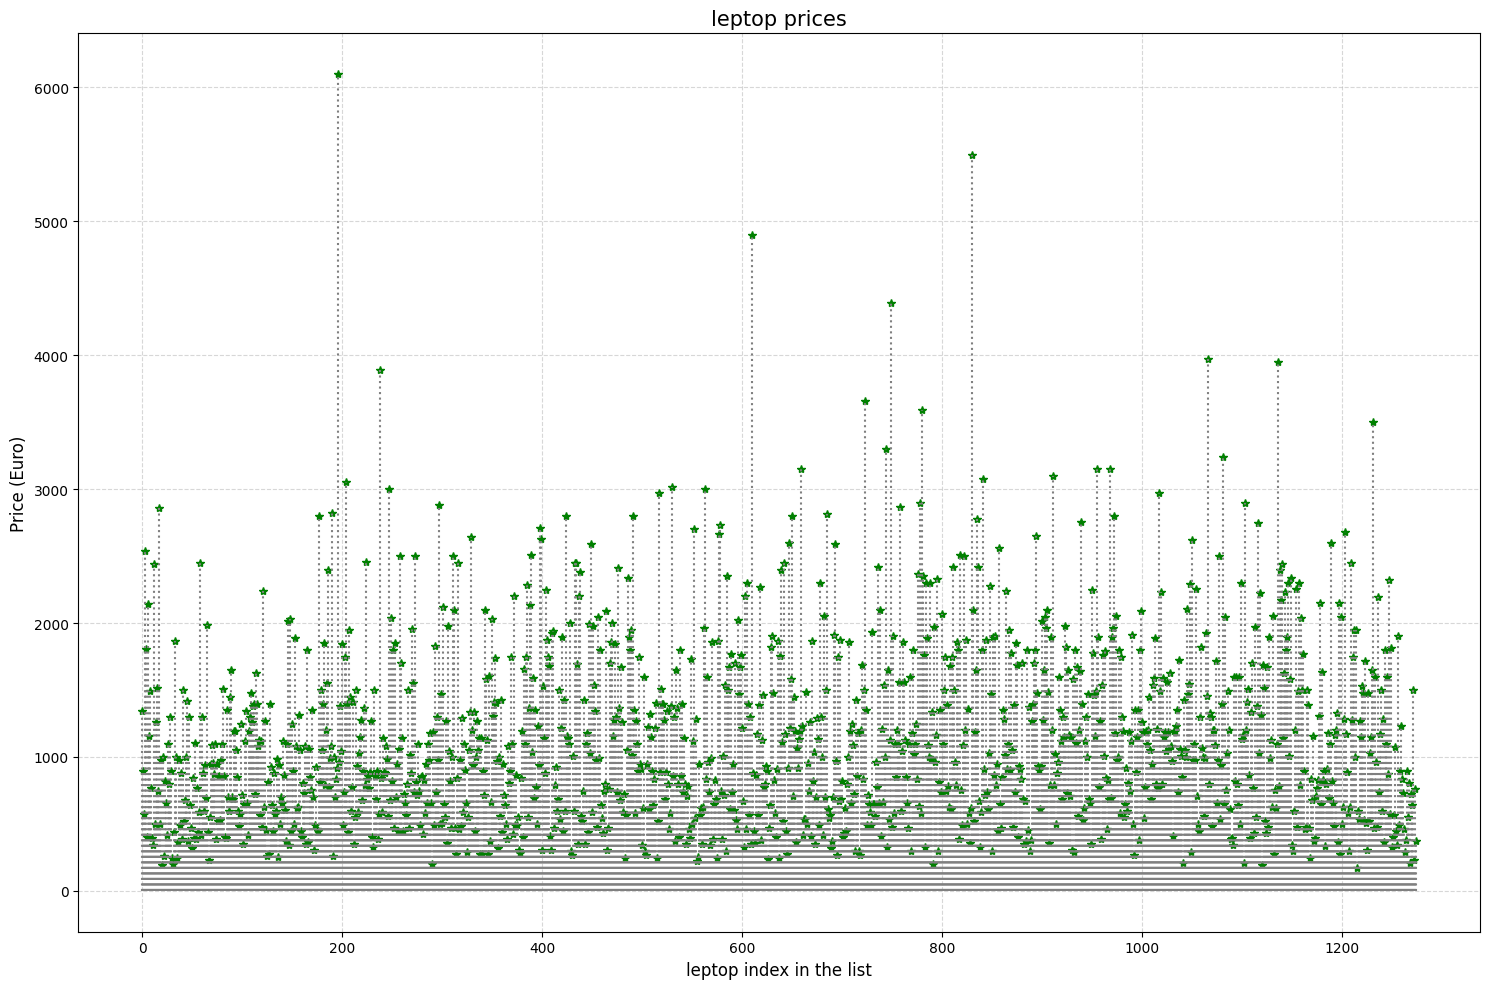

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the file, and keep it as 'data'
file_path = "laptop_price-dataset.csv"
data = pd.read_csv(file_path) #import the leptops file

# Create a chart of all laptop prices
plt.figure(figsize=(15, 10)) #sizes of the chart
plt.plot(data.index, data['Price (Euro)'], marker='*', linestyle='', color = 'green') #marks every leptop with green *, and dosnt connect them to each other
plt.vlines(x=data.index, ymin=0, ymax=data['Price (Euro)'], colors='grey', linestyles='dotted') #connect every * to its x value, so its easyer to get the leptops index
plt.title('leptop prices', fontsize=15)
plt.xlabel('leptop index in the list', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5) #making a backgroud net
plt.tight_layout()
plt.show()

##### Which company has on average the most expensive laptop? What is the average laptop price for each company?

avarage price of every company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64

The company with the highest average price is Razer with an average price of 3346.142857.


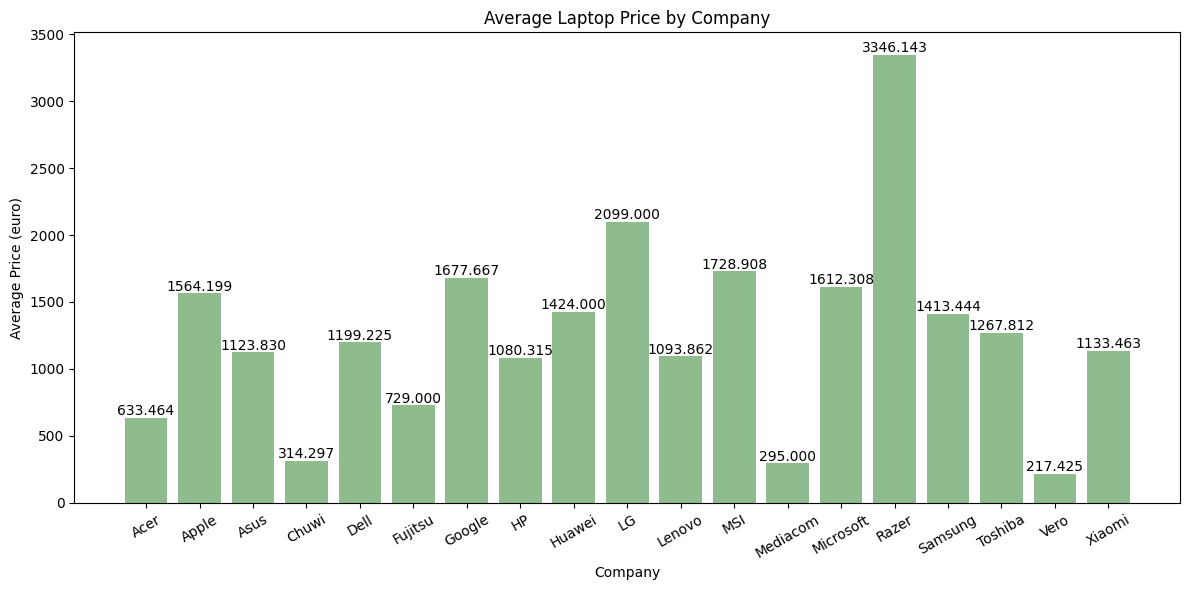

In [142]:
# Get the average price for each company
average_prices = data.groupby('Company')['Price (Euro)'].mean()
print("avarage price of every company:")
print(average_prices)

top_company = average_prices.idxmax() #get the most expensive company based on its avarage price
top_average = average_prices.max() #get the avarage price of this company
print(f"\nThe company with the highest average price is {top_company} with an average price of {top_average:.6f}.") #printing the result

plt.figure(figsize=(12, 6)) #sizes of the chart
plt.bar(average_prices.index, average_prices.values, color='darkseagreen') #For each company we will create a column whose height is the average price of that company
plt.title("Average Laptop Price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price (euro)")
for i, value in enumerate(average_prices.values): #adding the prices on the top of the columns 
    plt.text(i, value + 20, f"{value:.3f}", ha='center', fontsize=10) #Displays the price clearly in the center above the column
# displaying the chart
plt.xticks(rotation=30) # Italicizing the company names to make them readable
plt.tight_layout() # Adjust to avoid overlapping text
plt.show()

Find the different types of Operating systems present in the data - under the column name "OpSys".
(Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.)
##### Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

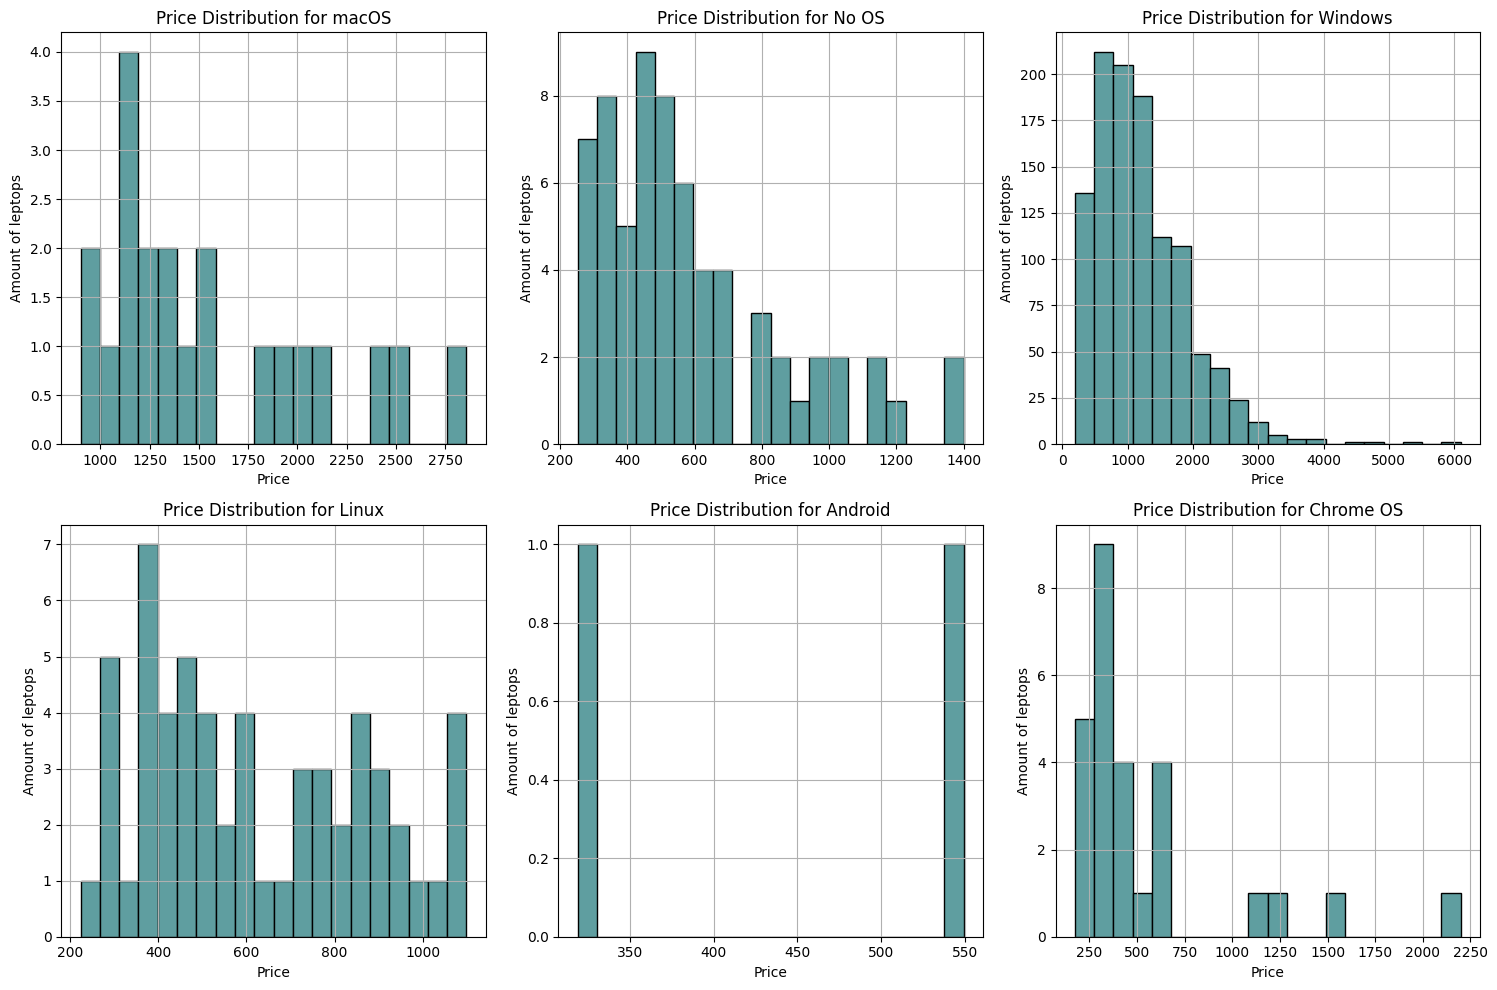

In [143]:
# maping the different types of operation systems:
opsys_mapping = {
    'macOS': 'macOS',
    'Mac OS X': 'macOS',
    'Windows 10': 'Windows',
    'Windows 10 S': 'Windows',
    'Windows 7': 'Windows',
    'Linux': 'Linux',
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'No OS': 'No OS'
}
# updating the 'OpSysy' column in the data
data['OpSys'] = data['OpSys'].replace(opsys_mapping)

# get all different types of operation systems
unique_opsys = data['OpSys'].unique()

# ploting a graph for every operation system
plt.figure(figsize=(15, 10)) # Define the figure size
for i, os in enumerate(unique_opsys, 1): # Loop through each unique operating system
    plt.subplot(2, 3, i)  # 2 rows, 3 graphs per row, plotting in position i
    # Filter data for the current operating system and plot a histogram of laptop prices
    # Create a histogram of laptop prices for the current operating system (`os`).
    # Divides the range of prices into 20 intervals (bins).
    data[data['OpSys'] == os]['Price (Euro)'].hist(bins=20, color='cadetblue', edgecolor='black')
    plt.title(f"Price Distribution for {os}") # Set the graph title
    plt.xlabel("Price")
    plt.ylabel("Amount of leptops")

plt.tight_layout() # Adjust spacing to avoid overlap between subplots
plt.show() # Display the plot

##### What is the relationship between RAM and computer price?
add an adequate plot to support your findings.

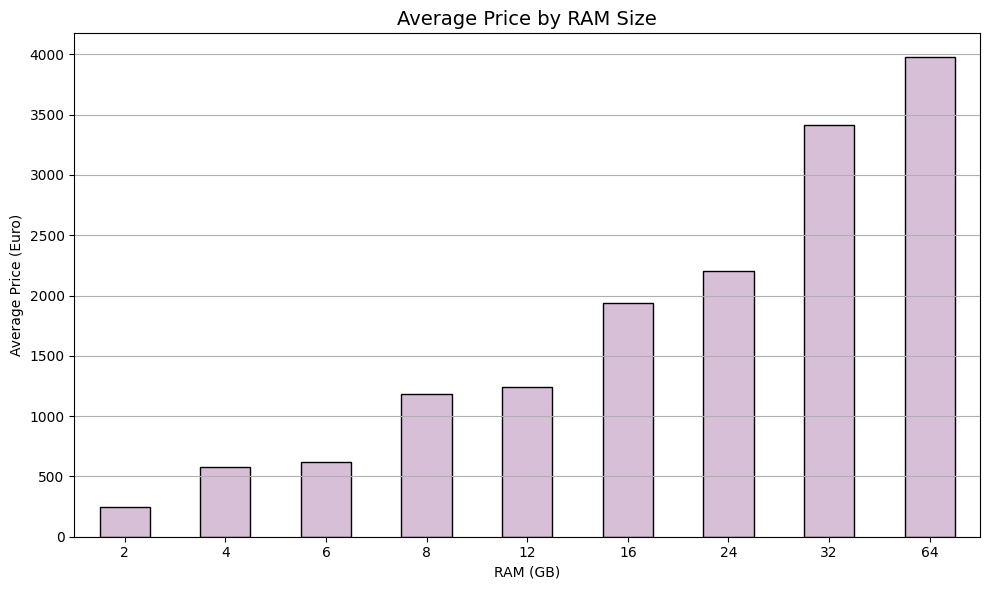

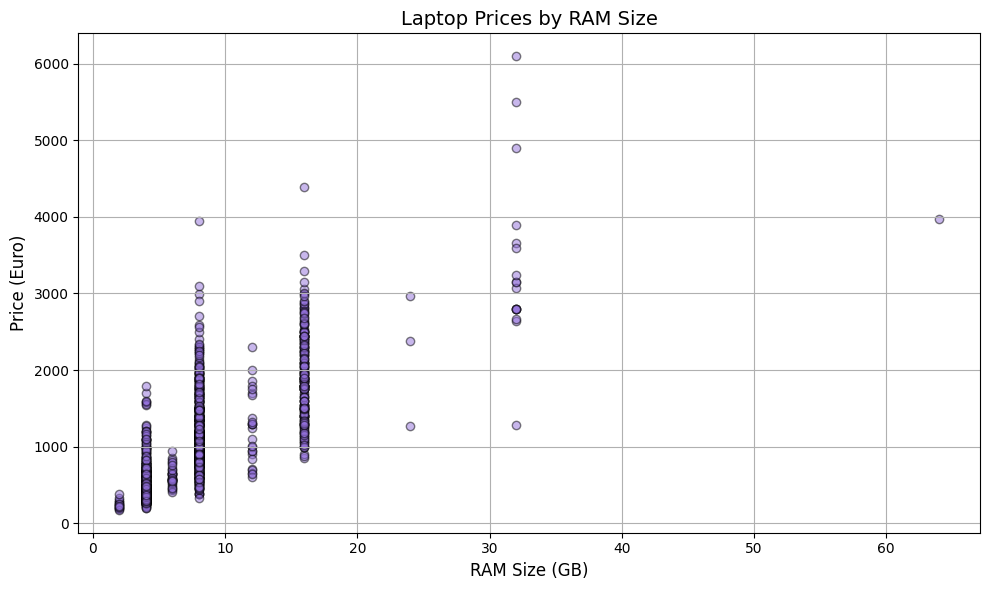

In [144]:
'''
This bar plot shows the average price of laptops for each unique RAM size (in GB).
Each bar represents a single RAM size, with its height corresponding to the average laptop price for that size.
The purpose of this plot is to highlight trends in average pricing as RAM size increases.
'''
#Calculate the average price for each RAM size
avg_price_by_ram = data.groupby('RAM (GB)')['Price (Euro)'].mean()
#Creating a bar chart
plt.figure(figsize=(10, 6))
avg_price_by_ram.plot(kind='bar', color='thistle', edgecolor='black')
plt.title("Average Price by RAM Size", fontsize=14)
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (Euro)")
# displying results
plt.xticks(rotation=0) #make the ram values to apear stright
plt.grid(axis='y') #making lines at a few y values to make the graph easyer to understand
plt.tight_layout()
plt.show()


'''
This scatter plot visualizes the individual prices of laptops based on their RAM size (in GB).
Each dot represents a single laptop, with its x-coordinate indicating the RAM size and its y-coordinate indicating the price.
The plot aims to provide an overview of the distribution of prices for each RAM size, allowing for the identification of trends or outliers.
'''
# Scatter plot of individual laptop prices by RAM size
plt.figure(figsize=(10, 6))  # Set figure size
# Create scatter plot
plt.scatter(data['RAM (GB)'], data['Price (Euro)'], color='mediumpurple', edgecolor='black', alpha=0.5)
# Add titles and labels
plt.title("Laptop Prices by RAM Size", fontsize=14)
plt.xlabel("RAM Size (GB)", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
# Adjust the layout and display the plot
plt.grid(True)  # Add gridlines for clarity
plt.tight_layout()
plt.show()


##### Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [145]:
'''
I used this code to find all different words that appears in the column 'memory':

# Extracting all the words from the Memory column
all_words = set()
for entry in data['Memory']:
    words = str(entry).split() # Dividing each value into words (assuming a space separates the words)
    all_words.update(words)
# Print all the unique words that appear
print("All unique words found:", all_words)


The result I got is:
All unique words found: {'32GB', '512GB', '256GB', 'Flash', '508GB', '+', '128GB', '1TB', 'SSD', 'Hybrid', '8GB', 'HDD', '240GB', '500GB', 'Storage', '180GB', '64GB', '16GB', '2TB', '1.0TB'}
I then selected from this list only the relevant words.
'''
# A function that extracts storage types from each row
def extract_storage_types(memory_entry):
    # Dividing the value into words
    words = str(memory_entry).split()
    # Create a list of words from the 'words' list
    # This ensures that only valid storage types (like 'SSD', 'HDD', etc.) are included in the list.
    # The result is a filtered list of storage types present in the memory entry.
    found_types = [word for word in words if word in storage_keywords]
    unique_types = set(found_types) #make sure a type doesnt apear twice
    return ', '.join(unique_types) # Returning the storage types as a comma-separated string

storage_keywords = {'SSD', 'HDD', 'Hybrid', 'Flash'} # A list of all the different types of storage
data['Storage type'] = data['Memory'].apply(extract_storage_types) # Create a new column with the storage type for each leptop

print("first 20 leptops storage:")
print(data[['Memory', 'Storage type']].head(20)) # printing first 20 results for testing

first 20 leptops storage:
                 Memory Storage type
0             128GB SSD          SSD
1   128GB Flash Storage        Flash
2             256GB SSD          SSD
3             512GB SSD          SSD
4             256GB SSD          SSD
5             500GB HDD          HDD
6   256GB Flash Storage        Flash
7   256GB Flash Storage        Flash
8             512GB SSD          SSD
9             256GB SSD          SSD
10            500GB HDD          HDD
11            500GB HDD          HDD
12            256GB SSD          SSD
13            256GB SSD          SSD
14            256GB SSD          SSD
15            256GB SSD          SSD
16            256GB SSD          SSD
17            512GB SSD          SSD
18              1TB HDD          HDD
19            128GB SSD          SSD


##### Bonus question:
Think of additional questions related to this data. What types of analyses and visualizations would you use to address them? Select two questions from your list and implement. Submit your list of questions, suggested analyses and visualization and the implementation.

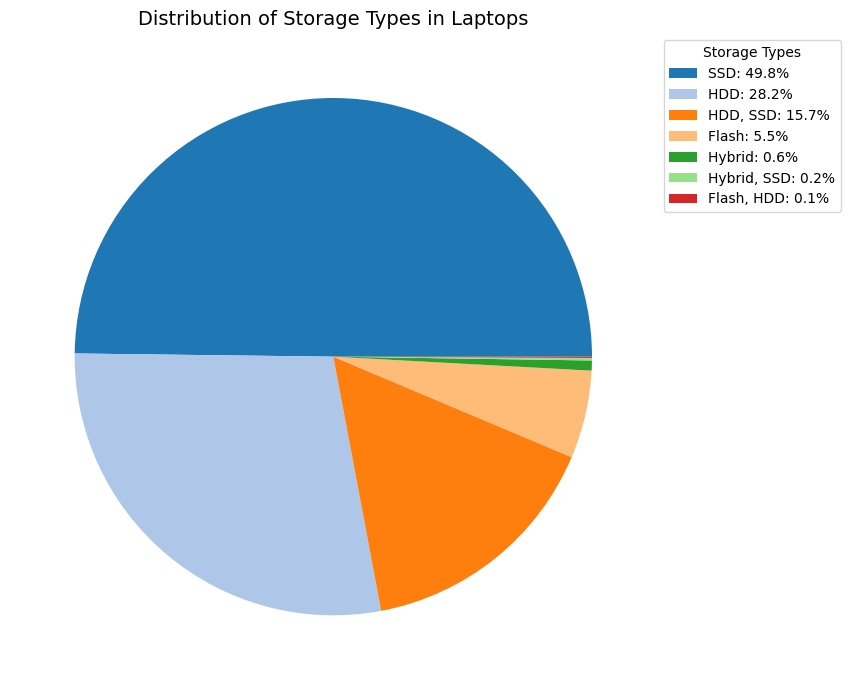

In [146]:
'''
This code calculates the percentage distribution of storage types in laptops and visualizes it using a pie chart.
For this part I wanted to create a new type of graph that had not yet been used in the assignment.
Additionally, this graph is aided by the 'storage type' column we created in the previous section
'''
# Count the frequency of each storage type
storage_counts = data['Storage type'].value_counts()
# Calculate percentages for each storage type
percentages = 100 * storage_counts / storage_counts.sum()
# Create the pie chart without percentage labels on the slices
plt.figure(figsize=(10, 7))
wedges, texts = plt.pie(storage_counts, colors=plt.cm.tab20.colors) # Use a color map for variety
# Create a list of labels for the legend, combining storage type and its percentage
# storage_counts.index: contains the names of storage types (e.g., 'SSD', 'HDD', etc.)
# percentages: contains the percentage of each storage type in the dataset
# zip(storage_counts.index, percentages): pairs each storage type with its percentage
# f"{label}: {percent:.1f}%": formats each pair as a string with the storage type and its percentage rounded to 1 decimal place
legend_labels = [f"{label}: {percent:.1f}%" for label, percent in zip(storage_counts.index, percentages)]

# Add a legend with percentages included
plt.legend(wedges, legend_labels, title="Storage Types", bbox_to_anchor=(1, 1))

# Add a title and adjust layout
plt.title("Distribution of Storage Types in Laptops", fontsize=14)
plt.tight_layout()
plt.show()

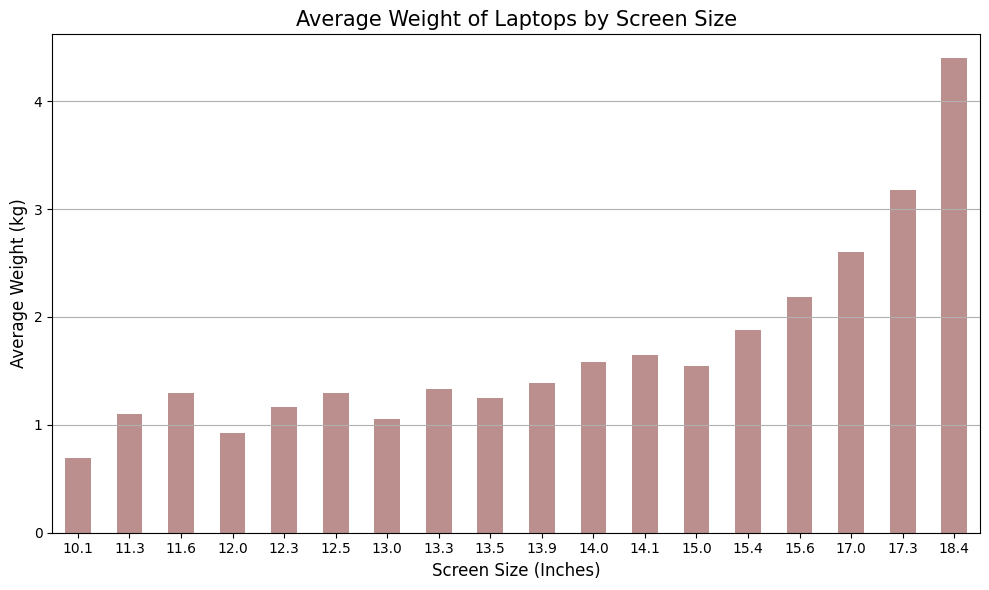

In [147]:
''' This code calculates and visualizes the average weight of laptops for each screen size.'''
# Group the dataset by screen size and calculate the average weight for each size
average_weight_by_screen_size = data.groupby('Inches')['Weight (kg)'].mean()

# Create a bar plot showing the average weight for each screen size
plt.figure(figsize=(10, 6))
average_weight_by_screen_size.plot(kind='bar', color='rosybrown')

# Set the title and labels for the plot
plt.title('Average Weight of Laptops by Screen Size', fontsize=15)
plt.xlabel('Screen Size (Inches)', fontsize=12)
plt.ylabel('Average Weight (kg)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

##### List of additional possible questions:
* What is the average CPU frequency for each CPU manufacturer (CPU_Company)?
    * Analysis: Group laptops by CPU manufacturer and calculate the average CPU frequency for each.
    * Visualization: Bar chart comparing the average CPU frequency for each manufacturer.

* Which company offers the widest price range for their laptops?
    * Analysis: Calculate the price range (difference between the maximum and minimum price) for each company.
    * Visualization: Bar plot showing the price range for each company.

* Which companies dominate specific price ranges?
    * Analysis: Divide laptops into price bins and determine the most frequent company in each bin.
    * Visualization: Stacked bar chart showing company representation across price ranges.

* What is the correlation between RAM size and laptop price?
    * Analysis: Calculate the correlation between RAM size and price.
    * Visualization: Scatter graph showing the price by RAM size.

* What types of processors (CPU Type) exist at each company, and are there companies that offer exclusive processors?
    * Analysis: examine the types of processors of each company.
    * Visualization: A table or grouped bar chart.

* What is the most common CPU Frequency in each price range?
    * Analysis: divide the prices into ranges and check the frequency of screen types in each range.
    * Visualization: table or bar chart.